In [70]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [71]:
mnist = input_data.read_data_sets('mnist/', one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [72]:
tf.reset_default_graph()

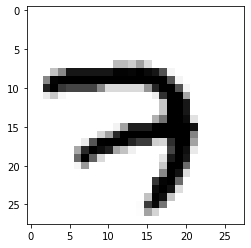

In [73]:
plt.imshow(mnist.train.images[0].reshape(28,28), cmap = 'Greys')

In [74]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

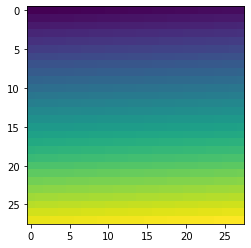

In [75]:
image_1 = np.arange(0,784).reshape(28,28)
plt.imshow(image_1)

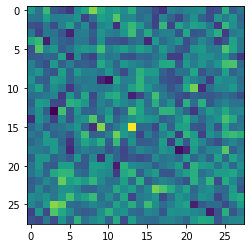

In [76]:
image_2 = np.random.normal(size = 784).reshape(28,28)
plt.imshow(image_2)

In [77]:
noise_ph = tf.placeholder(tf.float32, [None, 100])

In [78]:
def generator(noise, reuse = None):
    with tf.variable_scope('generator', reuse = reuse):
        hidden_layer_1 = tf.nn.relu(tf.layers.dense(inputs = noise, units = 128))
        hidden_layer_2 = tf.nn.relu(tf.layers.dense(inputs = hidden_layer_1, units = 128))
        output_layer = tf.layers.dense(inputs = hidden_layer_2, units = 784, activation = tf.nn.tanh)
        return output_layer

In [79]:
real_images_ph = tf.placeholder(tf.float32, [None, 784])

In [80]:
def discriminator(X, reuse = None):
    with tf.variable_scope('discriminator', reuse = reuse):
        hidden_layer_1 = tf.nn.relu(tf.layers.dense(inputs = X, units = 128))
        hidden_layer_2 = tf.nn.relu(tf.layers.dense(inputs = hidden_layer_1, units = 128))
        logits = tf.layers.dense(hidden_layer_2, units = 1)
        return logits

In [81]:
logits_imagens_reais = discriminator(real_images_ph)
logits_imagens_noise = discriminator(generator(noise_ph), reuse = True)

error_discriminator_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_reais,
                                                                                labels = tf.ones_like(logits_imagens_reais) * (0.9)))
error_discriminator_noise = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_noise,
                                                                                 labels = tf.zeros_like(logits_imagens_noise)))
error_discriminator = error_discriminator_real + error_discriminator_noise

error_generator = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_noise,
                                                                     labels = tf.ones_like(logits_imagens_noise)))


In [82]:
variables = tf.trainable_variables()
variables

[<tf.Variable 'discriminator/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'discriminator/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminator/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'discriminator/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminator/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'discriminator/dense_2/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'generator/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'generator/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'generator/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'generator/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'generator/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'generator/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [83]:
variables_discriminator = [v for v in variables if 'discriminator' in v.name]
print([v.name for v in variables_discriminator])

['discriminator/dense/kernel:0', 'discriminator/dense/bias:0', 'discriminator/dense_1/kernel:0', 'discriminator/dense_1/bias:0', 'discriminator/dense_2/kernel:0', 'discriminator/dense_2/bias:0']


In [84]:
variables_generator = [v for v in variables if 'generator' in v.name]
print([v.name for v in variables_generator])

['generator/dense/kernel:0', 'generator/dense/bias:0', 'generator/dense_1/kernel:0', 'generator/dense_1/bias:0', 'generator/dense_2/kernel:0', 'generator/dense_2/bias:0']


In [85]:
training_discriminator = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(error_discriminator,
                                                                                  var_list = variables_discriminator)
training_generator = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(error_generator,
                                                                            var_list = variables_generator)

In [86]:
batch_size = 100
test_sample = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    noise_test = np.random.uniform(-1, 1, size = (1,100))
    sample = sess.run(generator(noise_ph, True), feed_dict = {noise_ph: noise_test})
    
    batch = mnist.train.next_batch(100)
    batch_images = batch[0].reshape((100, 784))
    batch_images = batch_images * 2 - 1
    r = sess.run(discriminator(real_images_ph, True), feed_dict = {real_images_ph: batch_images})
    r2 = sess.run(tf.nn.sigmoid(r))
    ex = tf.constant([[1,2],[3,4]])
    print(sess.run(tf.ones_like(ex)))
    
    for epoch in range(300):
        batch_number = mnist.train.num_examples // batch_size
        for i in range(batch_number):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((100, 784))
            batch_images = batch_images * 2 - 1
            
            batch_noise = np.random.uniform(-1, 1, size = (batch_size, 100))
            
            _, costd = sess.run([training_discriminator, error_discriminator], 
                                 feed_dict = {real_images_ph: batch_images, noise_ph: batch_noise})
            _, costg = sess.run([training_generator, error_generator], feed_dict = {noise_ph: batch_noise})
            
        print('Epoch: ' + str(epoch + 1) + ' error D: ' + str(costd) + ' error G: ' + str(costg))
        
        noise_test = np.random.uniform(-1, 1, size = (1, 100))
        generated_image = sess.run(generator(noise_ph, reuse = True), feed_dict = {noise_ph: noise_test})
        test_sample.append(generated_image)
            
            

[[1 1]
 [1 1]]
Epoch: 1 error D: 0.4116302 error G: 4.898132
Epoch: 2 error D: 0.63773584 error G: 3.8361864
Epoch: 3 error D: 1.30176 error G: 2.0545306
Epoch: 4 error D: 0.9219845 error G: 2.9958336
Epoch: 5 error D: 1.7291933 error G: 2.3895829
Epoch: 6 error D: 1.4642533 error G: 2.1636915
Epoch: 7 error D: 0.7322277 error G: 5.0417576
Epoch: 8 error D: 0.71010524 error G: 3.6830227
Epoch: 9 error D: 1.1474911 error G: 4.6400566
Epoch: 10 error D: 0.82604694 error G: 2.1915832
Epoch: 11 error D: 1.4357016 error G: 2.2163062
Epoch: 12 error D: 0.7621174 error G: 4.045057
Epoch: 13 error D: 0.55346113 error G: 5.5614343
Epoch: 14 error D: 0.85151845 error G: 3.9843438
Epoch: 15 error D: 0.9097271 error G: 2.1003723
Epoch: 16 error D: 1.2366838 error G: 1.6850336
Epoch: 17 error D: 0.73678595 error G: 3.3574884
Epoch: 18 error D: 1.043973 error G: 1.9080104
Epoch: 19 error D: 0.80051327 error G: 3.167619
Epoch: 20 error D: 1.2032039 error G: 2.6910412
Epoch: 21 error D: 1.4329057 erro

Epoch: 171 error D: 1.3225088 error G: 1.0975037
Epoch: 172 error D: 1.2426474 error G: 1.1948317
Epoch: 173 error D: 1.1936712 error G: 1.1261542
Epoch: 174 error D: 1.0598695 error G: 1.461979
Epoch: 175 error D: 1.3105289 error G: 1.0947421
Epoch: 176 error D: 1.1892021 error G: 1.0800319
Epoch: 177 error D: 1.2668998 error G: 1.1244309
Epoch: 178 error D: 1.1582782 error G: 1.1531287
Epoch: 179 error D: 1.1725417 error G: 1.185802
Epoch: 180 error D: 1.4214389 error G: 1.0030587
Epoch: 181 error D: 1.3308547 error G: 1.1494612
Epoch: 182 error D: 1.2068295 error G: 1.036999
Epoch: 183 error D: 1.1319098 error G: 1.2317841
Epoch: 184 error D: 1.1486174 error G: 1.3180745
Epoch: 185 error D: 1.0696046 error G: 1.5828625
Epoch: 186 error D: 1.124443 error G: 1.1268611
Epoch: 187 error D: 1.2171831 error G: 1.1150297
Epoch: 188 error D: 1.2680902 error G: 0.9547516
Epoch: 189 error D: 1.2063549 error G: 1.0324274
Epoch: 190 error D: 1.1277246 error G: 1.2748921
Epoch: 191 error D: 1.22

In [87]:
sample.shape

(1, 784)

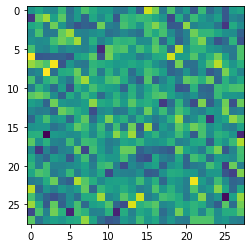

In [88]:
plt.imshow(sample.reshape(28,28))

In [89]:
batch = mnist.train.next_batch(100)
batch[0].shape
batch_images = batch[0].reshape((100, 784))

In [90]:
batch_images.shape

(100, 784)

In [91]:
batch_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [92]:
batch_images = batch_images * 2 - 1
batch_images[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [93]:
r.shape

(100, 1)

In [94]:
r

array([[-1.2639937 ],
       [-0.7557126 ],
       [-1.4050469 ],
       [ 0.4213961 ],
       [-1.2121661 ],
       [ 0.00748228],
       [-0.4075701 ],
       [-1.442141  ],
       [-1.881669  ],
       [-1.4042579 ],
       [-0.480532  ],
       [-1.0190032 ],
       [-1.485789  ],
       [-0.71259314],
       [-1.0695728 ],
       [-0.7833202 ],
       [-0.6339977 ],
       [-1.1327318 ],
       [-0.41367263],
       [-0.8786603 ],
       [-1.0475986 ],
       [-1.0924628 ],
       [-1.243638  ],
       [-1.2257433 ],
       [-1.4170929 ],
       [-1.2133188 ],
       [-0.23826197],
       [-1.006657  ],
       [-1.4564635 ],
       [-0.3292731 ],
       [-0.64694   ],
       [-0.48039457],
       [-1.2572848 ],
       [-1.3720076 ],
       [-1.3944997 ],
       [-1.5393901 ],
       [-1.184743  ],
       [-1.411545  ],
       [-1.1920027 ],
       [-1.3814856 ],
       [-0.78643364],
       [-0.88216543],
       [-2.3412542 ],
       [-1.0515034 ],
       [-1.1330136 ],
       [-0

In [95]:
r2

array([[0.22028716],
       [0.31957784],
       [0.19701646],
       [0.6038173 ],
       [0.22931801],
       [0.5018706 ],
       [0.3994949 ],
       [0.19121403],
       [0.13219728],
       [0.1971413 ],
       [0.3821265 ],
       [0.26522163],
       [0.18455462],
       [0.3290261 ],
       [0.25548434],
       [0.31360474],
       [0.34660462],
       [0.24365729],
       [0.3980318 ],
       [0.29345548],
       [0.2596865 ],
       [0.2511548 ],
       [0.22380336],
       [0.22692733],
       [0.19511773],
       [0.22911435],
       [0.44071472],
       [0.2676346 ],
       [0.18900883],
       [0.41841748],
       [0.34367943],
       [0.38215896],
       [0.22144167],
       [0.20229568],
       [0.19869038],
       [0.17662396],
       [0.23420046],
       [0.19599047],
       [0.23290096],
       [0.20077051],
       [0.31293494],
       [0.29272926],
       [0.08776345],
       [0.2589365 ],
       [0.24360539],
       [0.29870763],
       [0.3226069 ],
       [0.261

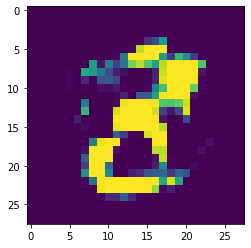

In [96]:
plt.imshow(test_sample[299].reshape(28,28))